In [ ]:
import pandas as pd
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tq
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
mypath = '/content/drive/MyDrive/Semester 6/Data Mining/Dataset_daun/Dataset_daun'

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split('/')[-1])
        file_name.append(name)

In [ ]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Nangka    340
Pepaya    340
dtype: int64

In [ ]:
df.head()

,path,file_name,tag
0,/content/drive/MyDrive/Semester 6/Data Mining/...,004.jpg,Pepaya
1,/content/drive/MyDrive/Semester 6/Data Mining/...,001.jpg,Pepaya
2,/content/drive/MyDrive/Semester 6/Data Mining/...,005.jpg,Pepaya
3,/content/drive/MyDrive/Semester 6/Data Mining/...,026.jpg,Pepaya
4,/content/drive/MyDrive/Semester 6/Data Mining/...,013.jpg,Pepaya


In [ ]:
X= df['path']
y= df['tag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

In [ ]:
print('train size', len(df_tr))
print('test size', len(df_te))

train size 510
test size 170


In [ ]:
df_all = pd.concat([df_tr, df_te], ignore_index=True)

# Reset index
df_all.reset_index(drop=True, inplace=True)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

#cek sample datanya
df_all.sample(3)


set    tag   
test   Nangka     80
       Pepaya     90
train  Nangka    260
       Pepaya    250
dtype: int64 



,path,tag,set
385,/content/drive/MyDrive/Semester 6/Data Mining/...,Pepaya,train
296,/content/drive/MyDrive/Semester 6/Data Mining/...,Pepaya,train
326,/content/drive/MyDrive/Semester 6/Data Mining/...,Nangka,train


In [ ]:
datasource_path = "/content/drive/MyDrive/Semester 6/Data Mining/Dataset_daun/Dataset_daun"
dataset_path = "/content/drive/MyDrive/Semester 6/Data Mining/Dataset_daun/Dataset_daun/dataset/"

In [ ]:
# for index, row in tq(df_all.iterrows()):

#     #detect filepath
#     file_path = row['path']
#     if os.path.exists(file_path) == False:
#             file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])

#     #make folder destination dirs
#     if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
#         os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))

#     #define file dest
#     destination_file_name = file_path.split('/')[-1]
#     file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)

#     #copy file from source to dest
#     if os.path.exists(file_dest) == False:
#         shutil.copy2(file_path,file_dest)

In [ ]:
# Parameter input untuk network
dim = (150, 150)
channel = (3, )
input_shape = dim + channel
# Batch size
batch_size = 16
# Epoch
epoch = 10

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Semester 6/Data Mining/Dataset_daun/Dataset_daun/dataset/train',
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Semester 6/Data Mining/Dataset_daun/Dataset_daun/dataset/test',
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

num_class = validation_generator.num_classes

Found 85 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
max_epochs = 5

In [ ]:
H = model.fit(
      train_generator,
      steps_per_epoch=8,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=max_epochs, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/5
8/8 - 14s - loss: 0.8097 - accuracy: 0.4688 - val_loss: 0.6761 - val_accuracy: 0.7000 - 14s/epoch - 2s/step
Epoch 2/5
8/8 - 9s - loss: 0.7165 - accuracy: 0.6250 - val_loss: 0.6468 - val_accuracy: 0.5000 - 9s/epoch - 1s/step
Epoch 3/5
8/8 - 7s - loss: 0.6147 - accuracy: 0.6562 - val_loss: 0.5148 - val_accuracy: 0.8000 - 7s/epoch - 865ms/step
Epoch 4/5
8/8 - 7s - loss: 0.5020 - accuracy: 0.7500 - val_loss: 0.3985 - val_accuracy: 0.8000 - 7s/epoch - 835ms/step
Epoch 5/5
8/8 - 6s - loss: 0.5147 - accuracy: 0.8125 - val_loss: 0.2579 - val_accuracy: 0.9000 - 6s/epoch - 700ms/step


In [ ]:
y_pred = model.predict(validation_generator)

# Konversi probabilitas prediksi menjadi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Ambil kelas target aktual dari generator validasi
y_true = validation_generator.classes

# Ambil nama kelas
class_labels = list(validation_generator.class_indices.keys())

# Membuat laporan klasifikasi
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

22/22 [==============================] - 3s 109ms/step
              precision    recall  f1-score   support

      Nangka       0.54      1.00      0.70        46
      Pepaya       0.00      0.00      0.00        39

    accuracy                           0.54        85
   macro avg       0.27      0.50      0.35        85
weighted avg       0.29      0.54      0.38        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


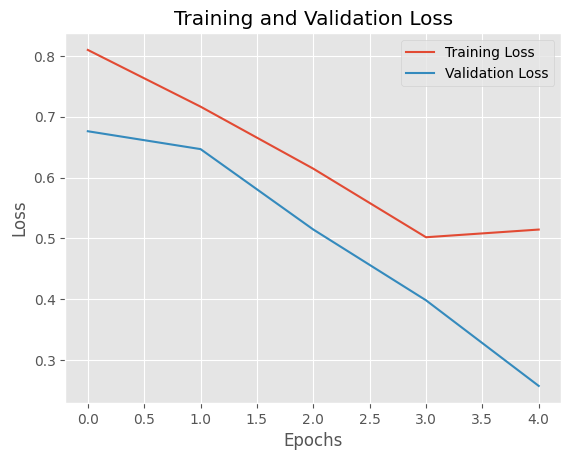

In [ ]:
# Ambil history dari model
history = H.history

# Plot loss dan val_loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


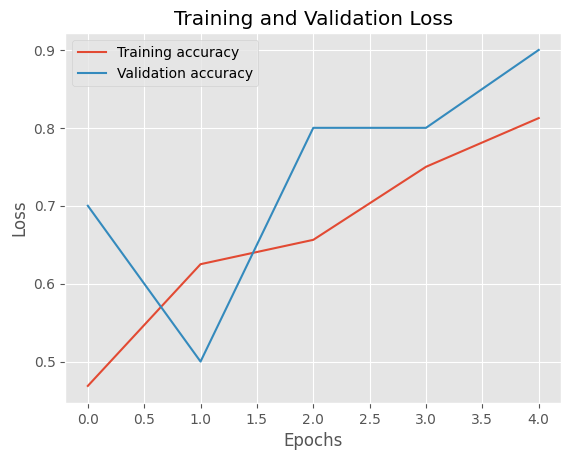

In [ ]:
# Ambil history dari model
history = H.history

# Plot loss dan val_loss
plt.plot(history['accuracy'], label='Training accuracy')
plt.plot(history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()